In [41]:
#wyznaczanie klastryzacji do dorobienia
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils.validation import check_array
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.manifold import TSNE
import numpy.random as random
import math
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import sklearn.metrics as metrics

df = pd.read_csv('iris.csv', header = None)
y = df.iloc[0:150, 4].values
X = df.iloc[0:150, 0:4].values

In [42]:
X_std = []
sum_x = 0

for i in range(len(X)):
    sum_x = sum_x + X[i]
    
sr = sum_x/len(X)

for i in range (len(X)):
    X_std.append((sr - X[i])/np.linalg.norm(sr-X[i]))
    
np.linalg.norm(X_std[3])
X_std = np.array(X_std)

In [43]:
X_std

array([[ 2.74982001e-01, -1.63756097e-01,  8.72297164e-01,
         3.69684322e-01],
       [ 3.45564304e-01,  2.10024948e-02,  8.63788652e-01,
         3.66078368e-01],
       [ 3.95241131e-01, -4.93187184e-02,  8.49710816e-01,
         3.45461490e-01],
       [ 4.49677170e-01, -1.54312809e-02,  8.16652320e-01,
         3.61429533e-01],
       [ 3.06625529e-01, -1.97306862e-01,  8.57339523e-01,
         3.63345192e-01],
       [ 1.84387534e-01, -3.50474952e-01,  8.55946342e-01,
         3.32452110e-01],
       [ 4.38701002e-01, -1.20907407e-01,  8.32002919e-01,
         3.17323137e-01],
       [ 3.20451515e-01, -1.30207177e-01,  8.57999431e-01,
         3.79728712e-01],
       [ 4.90272298e-01,  5.34430772e-02,  8.00966798e-01,
         3.39454122e-01],
       [ 3.51588974e-01, -1.59022575e-02,  8.41577284e-01,
         4.09731603e-01],
       [ 1.71187811e-01, -2.48157969e-01,  8.71899421e-01,
         3.85880494e-01],
       [ 3.98300188e-01, -1.30815525e-01,  8.23832401e-01,
      

In [44]:
def miara1 (X, licznik_T, p , wektor_reprezentantow):
    tab_pom = []
    
    for i in range(p):
        tab_pom.append(np.dot(wektor_reprezentantow[i], X[licznik_T % len(X)]))
        
    znaleziony_max = (np.where (tab_pom == np.amax(tab_pom)))
    
    zna = (znaleziony_max[0][0])
    
    return zna

def miara2 (X, licznik_T, p , wektor_reprezentantow):
    tab_pom = []
    
    for i in range(p):
        tab_pom.append(np.dot(wektor_reprezentantow[i], X[licznik_T % len(X)]))
        
    znaleziony_min = (np.where (tab_pom == np.amin(tab_pom)))
    
    zna = (znaleziony_min[0][0])
    
    return zna


def miara3 (X, licznik_T, p , wektor_reprezentantow):
    tab_pom = []
    
    for i in range(p):
        sum_pom = 0
        for j in  range(len(wektor_reprezentantow[0])):
            sum_pm += abs(wektor_reprezentantow[i][j] - X[licznik_T % len(X)][j])
        tab_pom.append(math.sqrt(sum_pom))
        
    znaleziony_min = (np.where (tab_pom == np.amin(tab_pom)))
    
    zna = (znaleziony_min[0][0])
    
    return zna

In [45]:
def Kohonen (X, T, alfa, p, typ_alfa, miara, C1, C2):
    
    wektor = []
    rand_gen = np.random.RandomState(0)
    
    for j in range (p):
        for i in range(len(X)):
            vector_temp = rand_gen.normal(loc = 0.0, scale = 0.01, size = len(X[0]))
            wektor.append(vector_temp / np.linalg.norm(vector_temp))
            
        wektor_reprezentantow = np.array(wektor)
        
    Tabela_m = [0] * len(X)
    alfa_koh = alfa
    
    for licznik_T in range(T):
        
        if miara == 1:
            mod = miara1 (X_std, licznik_T, p, wektor_reprezentantow)
            Tabela_m[licznik_T % len(X)] = mod
            
        if miara == 2:
            mod = miara2 (X_std, licznik_T, p, wektor_reprezentantow)
            Tabela_m[licznik_T % len(X)] = mod
        
        if miara == 3:
            mod = miara3 (X_std, licznik_T, p , wektor_reprezentantow)
            Tabela_m[licznik_T % len(X)] = mod
            
    
        wektor_reprezentantow[mod] = wektor_reprezentantow[mod] + alfa_koh * (X_std[licznik_T % len(X_std)] - wektor_reprezentantow[mod])
        
        wektor_reprezentantow[mod] = wektor_reprezentantow[mod]/(np.linalg.norm(wektor_reprezentantow[mod]))
        
        
        if typ_alfa == 1:
            alfa_koh = alfa*(T-licznik_T)/T
            
        if typ_alfa == 2:
            alfa_koh = alfa * math.exp(-C1 * licznik_T)
                                                                              
        if typ_alfa == 3:
            alfa_koh = C1 / (C2 * licznik_T)
            
    return wektor_reprezentantow, Tabela_m

koh, tabi = Kohonen(X, 15000, 2, 2, 1, 2, 1.3, 1.4) #3 alfa, 6 miara

print(koh)

[[-0.07161304  0.29037739 -0.86340769 -0.40630002]
 [-0.07159043  0.29043252 -0.86346099 -0.40615131]
 [-0.06784103  0.2698676   0.09467325  0.95582742]
 ...
 [ 0.61524368 -0.26691217 -0.17740117  0.7202513 ]
 [-0.09540332 -0.28051088  0.76587051  0.57066121]
 [ 0.00862377 -0.27249147 -0.92327558  0.27062193]]


In [46]:
y_kohon = np.array(tabi)
print(y_kohon)

[0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0
 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1
 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0
 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0
 1 0]


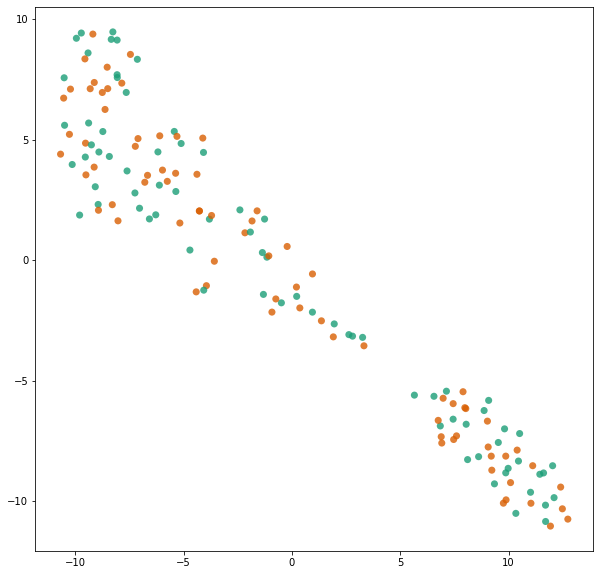

<Figure size 432x288 with 0 Axes>

In [47]:
from sklearn.manifold import TSNE

tsne_tab = TSNE(random_state = 1).fit_transform(X_std)

plt.figure(figsize=(10, 10))

plt.scatter(tsne_tab[:,0], tsne_tab[:,1], lw=0, s=50,
           alpha = 0.8, edgecolors = 'black', c = np.array(sns.color_palette('Dark2', 111))[y_kohon.astype(int)])


plt.show()

plt.clf()

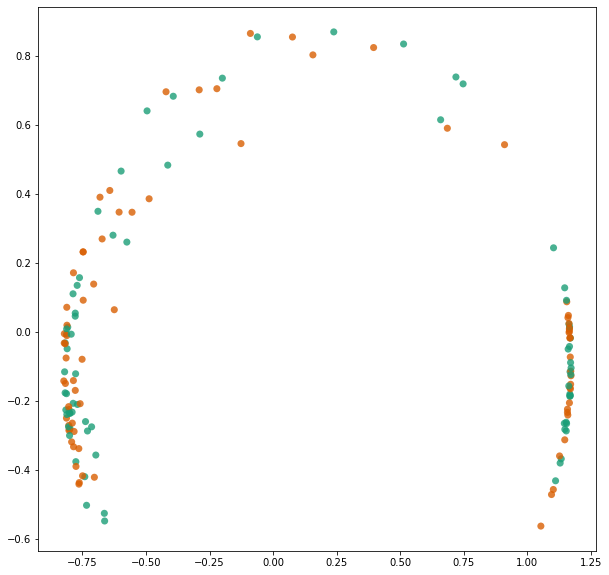

<Figure size 432x288 with 0 Axes>

In [48]:
pca = PCA(n_components = 2)

pca_result = pca.fit_transform(X_std)
pca_df = pd.DataFrame(data = pca_result, columns = ['pca1', 'pca2'])

plt.figure(figsize=(10,10))
plt.scatter(pca_df.values[:,0], pca_df.values[:,1], lw = 0, s=50,
            alpha = 0.8, edgecolors = 'black', c = np.array(sns.color_palette('Dark2', 111))[y_kohon.astype(int)])

plt.show()
plt.clf()

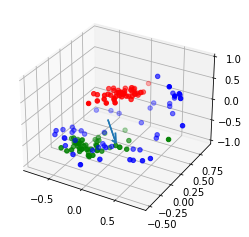

In [49]:
srodek = [0,0,0]
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

u1, v1, w1 = zip(srodek, srodek)

u2, v2, z2 = zip (koh[0, 0:3], koh[1, 0:3])

ax.quiver(u1, v1, w1, u2, v2, z2)
ax.scatter (X_std[0:49, 0], X_std[0:49, 1], X_std[0:49,2], c = 'red')
ax.scatter (X_std[50:99, 0], X_std[50:99, 1], X_std[50:99,2], c = 'blue')
ax.scatter (X_std[100:149, 0], X_std[100:149, 1], X_std[100:149,2], c = 'g')

In [50]:
tab_indeks = []

for p in range(2, 7):
    wek_rep, tabi2 = Kohonen(X, 1500, 0.1, p, 1, 1, 1, 1)
    
    wynikDB = metrics.davies_bouldin_score(X, tabi2)
    tab_indeks.append(wynikDB)
    print(wynikDB)
    
print(np.argmin(wynikDB))

0.46114864038313497
0.6311028339005312
0.8090381658963602
0.9455131930286378
0.978474394496849
0
